In [2]:
import sys, os
import pdb
sys.path.append("/Volumes/working/album_project/Album_server")

import numpy as np

import matplotlib.pyplot as plt
from skimage import io
from IPython.display import clear_output


import common_lib as clb


In [18]:
image_parent_path = "/Volumes/working/album_project/album_data"
usr_nm = 'zzx'
img_path = os.path.join(image_parent_path, usr_nm + "_label_scene")
res = clb.find_all_file_name(img_path, '.jpg', '')

476 files found in /Volumes/working/album_project/album_data/zzx_label_scene



11 files found in /Volumes/working/album_project/album_data/zzx_label_scene/Event0037/Scene_0

/Event0037/Scene_0


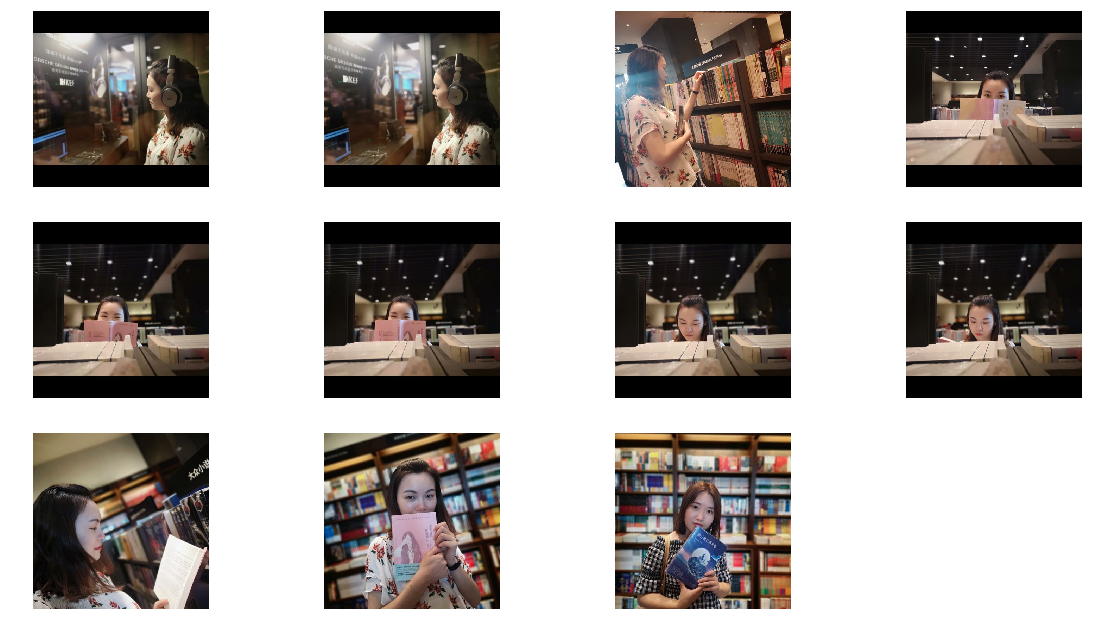

11 files found in /Volumes/working/album_project/album_data/zzx_label_scene/Event0037/Scene_1

/Event0037/Scene_1


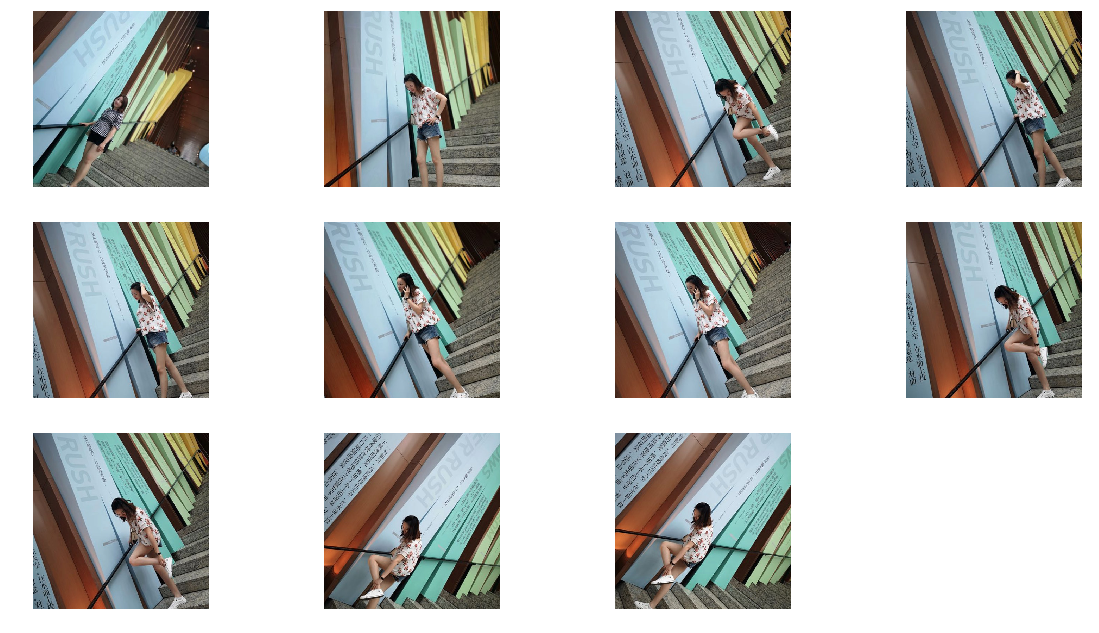

17 files found in /Volumes/working/album_project/album_data/zzx_label_scene/Event0037/Scene_2

/Event0037/Scene_2


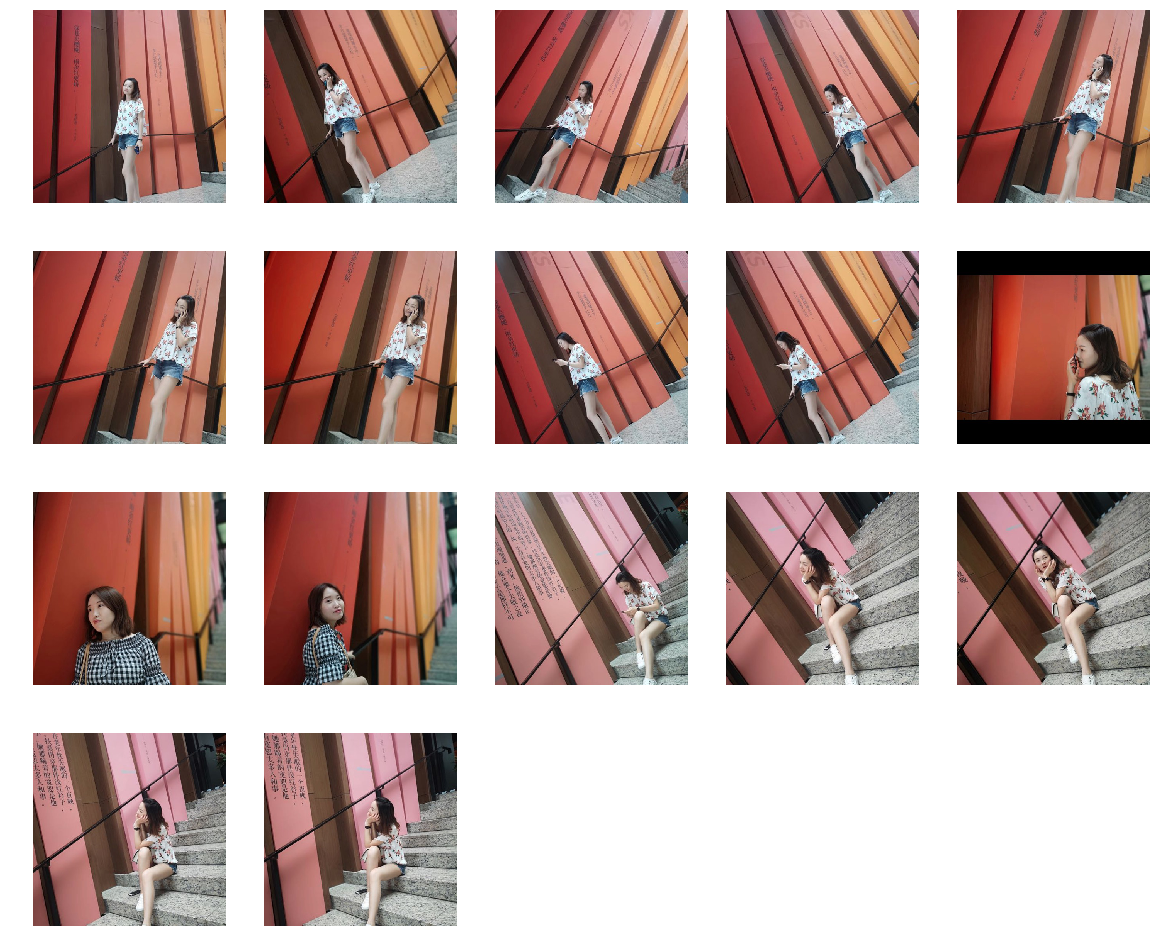

27 files found in /Volumes/working/album_project/album_data/zzx_label_scene/Event0037/Scene_3

/Event0037/Scene_3


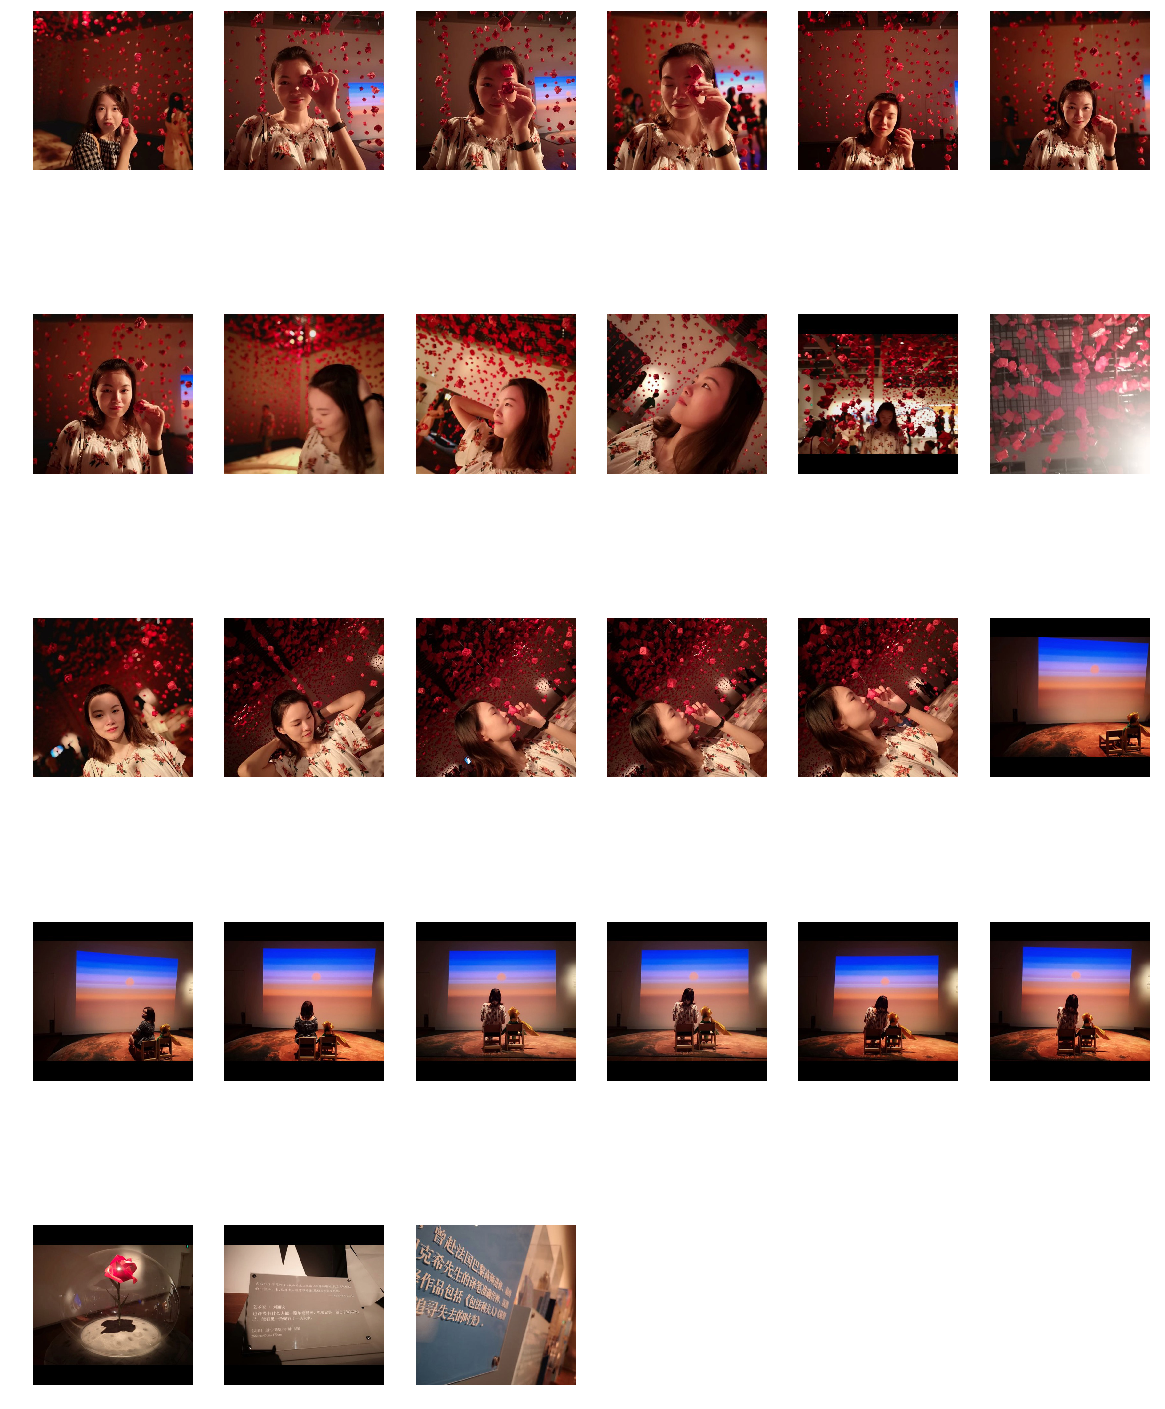

16 files found in /Volumes/working/album_project/album_data/zzx_label_scene/Event0037/Scene_noise

/Event0037/Scene_noise


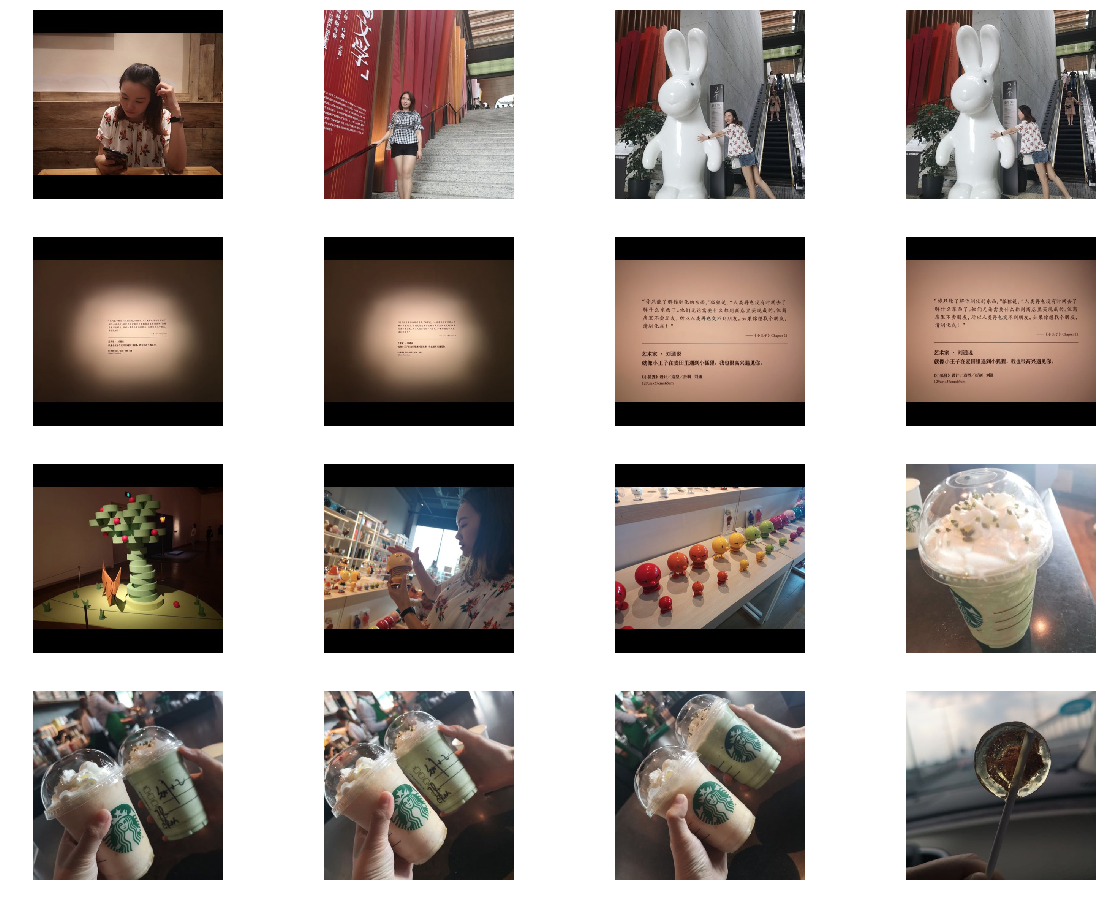

Press any key to continue...q
> <ipython-input-19-26ee9bfc6332>(10)<module>()
-> if key == 'c':
(Pdb) q


BdbQuit: 

In [19]:
###### check scenes ####
event_idx = -1
for root, dirs, files in os.walk(img_path, topdown=True):
    if len(dirs) == 0:
        if event_idx != root.split('Event')[1].split('/Scene')[0]:
            event_idx = root.split('Event')[1].split('/Scene')[0]
            key =  input("Press any key to continue...")
            if key == 'q':
                pdb.set_trace()
            if key == 'c':
                clear_output()
            clear_output()

        res = clb.find_all_file_name(root, '.jpg', '')
        print("%s" %root.split(img_path)[1])
        plt.figure(figsize=(20,len(res)))
        for idx, img_name in enumerate(res):
            img = io.imread(img_name[0])
#             pdb.set_trace()
            plt.subplot(int(np.floor(np.sqrt(len(res)))), int(np.ceil((len(res)/int(np.floor(np.sqrt(len(res))))))), idx+1)
            plt.imshow(img)
            plt.axis('off')
#         plt.suptitle("%s" %root.split(img_path)[1])
        plt.show()

#     pdb.set_trace()

In [5]:
## replace images in hxl_label_raw and hxl_label_scene (to include gps and so)
import shutil
image_parent_path = "/Volumes/working/album_project/album_data"
usr_nm = 'hxl'
source_path = os.path.join(image_parent_path, usr_nm)
img_source = clb.find_all_file_name(source_path, '.jpg', '')
dest_path = os.path.join(image_parent_path, usr_nm + "_label_raw") 
img_dest = clb.find_all_file_name(dest_path, '.jpg', '')
# dictionarize
source_dict = dict()
dest_dict = dict()
for fn_full, fn in img_source:
    source_dict[fn] = fn_full
for fn_full, fn in img_dest:
    dest_dict[fn] = fn_full
# copy
for fn_full, fn in img_dest:
#     pdb.set_trace()
    os.remove(dest_dict[fn])
    shutil.copy2(source_dict[fn], dest_dict[fn])
    

1668 files found in /Volumes/working/album_project/album_data/hxl

1667 files found in /Volumes/working/album_project/album_data/hxl_label_raw



In [22]:
# # resize (it will remove gps and exif information...)
# # import matplotlib.pyplot as plt
# import tensorflow as tf
# import numpy as np
# import os
# from PIL import Image
# import time

# start = time.clock()

# def file_name2(file_dir):  # 特定类型的文件
#     L = []
#     for root, dirs, files in os.walk(file_dir):
#         for file in files:
#             if os.path.splitext(file)[1] == '.jpg':
#                 L.append(os.path.join(root, file))
#     return L


# path = file_name2('/Volumes/working/album_project/album_data/zzx_label_raw')
# # print(path)


# def tra(index, path):
#     # 图片默认w:h = (3648:5472)
#     try:
#         image_raw_data_jpg = tf.gfile.FastGFile(path, 'rb').read()

#         im = Image.open(path)#返回一个Image对象
#         wh_ratio = (im.size[0]/im.size[1])    
# #         heigh = int(im.size[1]/4)
#         heigh = 500
#         width = int(heigh * wh_ratio)
        

#         #######################当allow_growth设置为True时，分配器将不会指定所有的GPU内存，而是根据需求增长
#         gpu_options = tf.GPUOptions(allow_growth=True)
#         config = tf.ConfigProto(device_count={"CPU": 1}, # limit to num_cpu_core CPU usage  
#                 inter_op_parallelism_threads = 1,   
#                 intra_op_parallelism_threads = 4,  
#                 log_device_placement=True)  
#         #######################创建新图，将新图作为默认图
#         g = tf.Graph()
#         with tf.Session(graph=g,config=config) as sess:
#             img_data_jpg = tf.image.decode_jpeg(image_raw_data_jpg)

#             # img_data_jpg = tf.image.convert_image_dtype(img_data_jpg, dtype=tf.float32)

#         #   BILINEAR = 0
#         #   NEAREST_NEIGHBOR = 1
#         #   BICUBIC = 2
#         #   AREA = 3
#             resize_0 = tf.image.resize_images(img_data_jpg, (heigh,width), method=tf.image.ResizeMethod.BILINEAR)

#             resized = np.asarray(resize_0.eval(), dtype='uint8')
#             encoded_image = tf.image.encode_jpeg(resized)
#             with tf.gfile.GFile(path, "wb") as f:
#                 f.write(encoded_image.eval())
#         return 0
#     except :
#         print ("Error: 文件读取失败"+path)
#         return 1
   
# for index, value in enumerate(path):
#     # print(index)
#     if(tra(index, value)==1):
#         continue
#     if index % 300 == 0:
#         print(value)


# elapsed = (time.clock() - start)
# print("运行时间: ", elapsed)
    

/Volumes/working/album_project/album_data/zzx_label_scene/Event0000/Scene_0/zzx-0593.jpg
/Volumes/working/album_project/album_data/zzx_label_scene/Event0037/Scene_1/zzx-0150.jpg
运行时间:  102.95166500000005


In [17]:
img_path_parent = "/Volumes/working/album_project/album_data"
plist_path_parent='/Volumes/working/album_project/gps_time_info/'
usr_nm = 'zzx'
plist_path = os.path.join(plist_path_parent, usr_nm)
## get plist information
# json_obj =
fns_gps = clb.find_all_file_name(plist_path, '.plist', 'gps')
fns_exif = clb.find_all_file_name(plist_path, '.plist', 'exif')
gps_info = []
exif_info = []
def dictionarize(fns_list):
    res = {}
    for fn,fn_true in fns_list:
        res[fn_true] = fn
    return res
        
info_dict = dict()
fns_plist = np.array([f[1].split('-gps')[0] + '.jpg' for f in fns_gps])
fns_label_raw = clb.find_all_file_name(os.path.join(img_path_parent, usr_nm + "_label_raw"), '.jpg', '')
dict_raw = dictionarize(fns_label_raw)
fns_label_scene = clb.find_all_file_name(os.path.join(img_path_parent, usr_nm + "_label_scene"), '.jpg', '')
dict_scene = dictionarize(fns_label_scene)
count = 0
res_list = []
for idx, fn in enumerate(fns_plist):
    if fn in dict_raw and fn not in dict_scene:
        count += 1
        shutil.copy(dict_raw[fn], dict_raw[fn].replace("_raw", "_scene"))
        res_list.append(dict_raw[fn].split("Event")[1])
print(count)
for rr in sorted(res_list):
    print(rr)

458 files found in /Volumes/working/album_project/gps_time_info/zzx

458 files found in /Volumes/working/album_project/gps_time_info/zzx

458 files found in /Volumes/working/album_project/album_data/zzx_label_raw

458 files found in /Volumes/working/album_project/album_data/zzx_label_scene

0
